In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 25)

In [53]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv')
df.sample(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
831,1808,1,0.5,1,1,0,31,0.5,92,2,16,714,1208,2736,9,1,8,0,0,1,3
1671,1146,0,3.0,0,5,1,57,0.4,111,5,10,73,583,291,19,9,11,1,1,1,0
1769,733,1,0.6,1,0,0,63,0.3,105,7,10,950,1739,984,17,4,9,1,0,1,0
1983,1262,0,1.8,1,12,0,34,0.1,149,5,16,223,737,3248,13,3,4,0,1,1,2
1567,940,0,2.9,0,0,0,16,0.7,115,4,1,499,1090,2192,15,13,9,1,1,1,1
1066,1809,0,0.5,0,6,0,23,0.7,123,6,19,433,1661,2784,12,6,20,1,1,1,3


In [54]:
# <!-- price range
#     0 (low cost)
#     1 (medium cost)
#     2 (high cost)
#     3(very high cost) -->

In [55]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


x = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
l=LogisticRegression()
l.fit(x_train,y_train)
pred=l.predict(x_test)
accuracy_score(pred,y_test)



0.9775

In [57]:
df2=pd.DataFrame()

In [58]:
df2['Predicted_price_range']=y_test

In [59]:
dc={0:'low cost',1:'medium cost',2:'high cost',3:'very high cost'}
df2['Predicted_price_range']=df2['Predicted_price_range'].map(dc)
df2.head()

,Predicted_price_range
1860,low cost
353,high cost
1333,medium cost
905,very high cost
1289,medium cost


Text(0.5, 1.0, 'PRICE CLASSIFICATION')

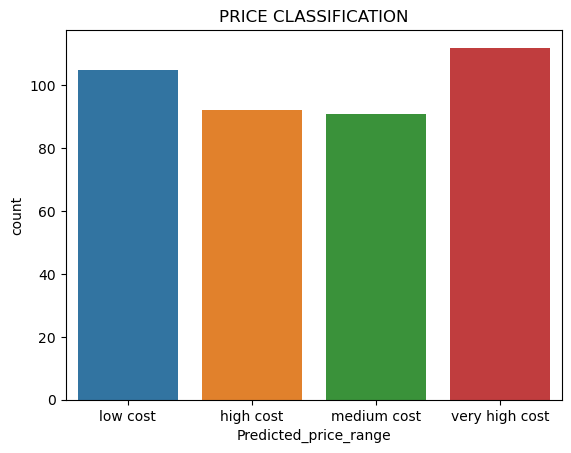

In [65]:
sns.countplot(x=df2['Predicted_price_range']);
plt.title('PRICE CLASSIFICATION')